## Rabi Oscillations in TLS

We study Rabi oscillations in isolated two-level system.

NOTE: this tutorial makes heavy use of the liberal way GRANAD lets you group orbitals. You might want to consult the tutorial on orbital lists first.

## Building a two-level system

Consider an isolated atom, modelled as a two-level system. Each level is an orbital, so let's combine them in a list.

In [1]:
from granad import Orbital, OrbitalList

lower_level = Orbital(tag="atom")
upper_level = Orbital(tag="atom")
atom = OrbitalList([lower_level, upper_level])

We have used a tag to signify that these the orbitals belong to the same atom. Let's see what we have done.

In [2]:
print(atom)

List with 2 orbitals, 2 electrons.
[0] electrons excited from [0] to [0].
group id 1 : 1 orbitals
group id 2 : 1 orbitals


We see that GRANAD assumes that every orbital is filled. But we want only the one of the levels filled. So, we set the electron number to 1.

In [3]:
atom.simulation_params.electrons = 1
print(atom)

List with 2 orbitals, 1 electrons.
[0] electrons excited from [0] to [0].
group id 1 : 1 orbitals
group id 2 : 1 orbitals


We now need to specify the Hamiltonian. We can do so by setting the elements corresponding to the orbitals.

In [4]:
atom.set_hamiltonian_element(upper_level, lower_level, 2.0)
atom.set_hamiltonian_element(upper_level, upper_level, 0.5)
atom.set_hamiltonian_element(lower_level, lower_level, -0.5)
print(atom)
print(atom.hamiltonian)

List with 2 orbitals, 1 electrons.
[0] electrons excited from [0] to [0].
group id 1 : 1 orbitals
group id 2 : 1 orbitals


[[-0.5+0.j  2. +0.j]
 [ 2. +0.j  0.5+0.j]]


Setting dipole transitions is similar. We want the lower and upper level to be connected by a dipole transition in z-direction.

In [5]:
atom.set_dipole_transition(upper_level, lower_level, [1, 0, 0])
print(atom)

List with 2 orbitals, 1 electrons.
[0] electrons excited from [0] to [0].
group id 1 : 1 orbitals
group id 2 : 1 orbitals


We set the initial excited state (in our point of view, this is a HOMO-LUMO transition).

In [6]:
atom.set_excitation(atom.homo, atom.homo + 1, 1)
print(atom)

List with 2 orbitals, 1 electrons.
[1] electrons excited from [0] to [1].
group id 1 : 1 orbitals
group id 2 : 1 orbitals


We consider a continuous wave as an external illumination.

In [7]:
from granad import Wave

wave = Wave(amplitudes=[0.05, 0, 0], frequency=2)

We propagate the system in time.

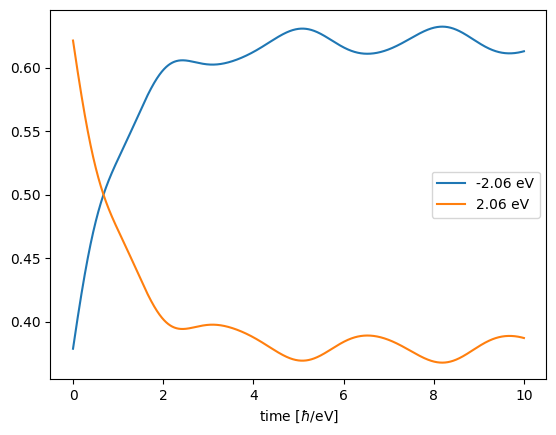

In [8]:
time, density_matrices = atom.get_density_matrix_time_domain(
    end_time=10, relaxation_rate=1, illumination=wave, use_rwa=True
)
atom.show_time_dependence(density_matrices, time=time)